In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de arquivos

In [2]:
pasta = "row_data/"
list_file = [
    {
        "file": pasta + "2019/Dados da 1° campanha de arrasto embarcado - Aterro.xlsx",
        "tables": ["Ponto 1", "Ponto 2", "Ponto 3"],
        "pontos": ["1", "2", "3"],
        "tipo": "Embarcado"
    }, {
        "file": pasta + "2019/Dados da 1° campanha arrasto de praia - Aterro (ATUALIZADA).xlsx",
        "tables": ["Arrasto 1", "Arrasto 2", "Arrasto 3", "Arrasto 4"],
        "pontos": ["1", "2", "3", "4"],
        "tipo": "Terra"
    }, {
        "file": pasta + "2019/Arrasto embarcado 19.10.19.xlsx",
        "tables": ["PONTO 01", "PONTO 02", "PONTO 03"],
        "pontos": ["1", "2", "3"],
        "tipo": "Embarcado"
    }, {
        "file": pasta + "2019/Arrasto de Terra 19.10.19.xlsx",
        "tables": ["Arrasto 1", "Arrasto 2", "Arrasto 3", "Arrasto 4"],
        "pontos": ["1", "2", "3", "4"],
        "tipo": "Terra"
    }, {
        "file": pasta + "2020/P1.xlsx",
        "tables": ["Página1"],
        "pontos": ["1"],
        "tipo": "Terra"
    }, {
        "file": pasta + "2020/P2.xlsx",
        "tables": ["Página 1"],
        "pontos": ["2"],
        "tipo": "Terra"
    }, {
        "file": pasta + "2020/P3.xlsx",
        "tables": ["P3"],
        "pontos": ["3"],
        "tipo": "Terra"
    }, {
        "file": pasta + "2020/P4.xlsx",
        "tables": ["Página1"],
        "pontos": ["4"],
        "tipo": "Terra"
    }, {
        "file": pasta + "2020/P1emb.xlsx",
        "tables": ["ARE P1 161120"],
        "pontos": ["1"],
        "tipo": "Embarcado"
    }, {
        "file": pasta + "2020/P2emb.xlsx",
        "tables": ["ARE P2 161120"],
        "pontos": ["2"],
        "tipo": "Embarcado"
    }, {
        "file": pasta + "2020/P3emb.xlsx",
        "tables": ["ARE P3 161120"],
        "pontos": ["3"],
        "tipo": "Embarcado"
    }, {
        "file": pasta + "2022/P1.xlsx",
        "tables": ["Página1"],
        "pontos": ["1"],
        "tipo": "Terra"
    }, {
        "file": pasta + "2022/P2.xlsx",
        "tables": ["P2"],
        "pontos": ["2"],
        "tipo": "Terra"
    }, {
        "file": pasta + "2022/P3.xlsx",
        "tables": ["Página1"],
        "pontos": ["3"],
        "tipo": "Terra"
    }, {
        "file": pasta + "2022/P4.xlsx",
        "tables": ["Página1"],
        "pontos": ["4"],
        "tipo": "Terra"
    }
]

# Função de leitura inicial.

Leitura e formatação inicial dos dados

In [3]:
def split_data(data, ponto, tipo):

    data["ARRASTO"] = [data.iloc[0]["ARRASTO"]for i in range(data.shape[0])] 
    data["LOCAL"] = [data.iloc[0]["LOCAL"]for i in range(data.shape[0])] 
    day = data.iloc[0]["DATA"]

    head_pattern = ["ARRASTO", "LOCAL", "ESPECIE", "N° DE INDIVIDUOS", "CT (cm)", "PESO (g)"]
    head_inicial = ["ARRASTO", "LOCAL", "ESPECIE 1", "N° DE INDIVIDUOS", "CT (cm)", "PESO (g)"]
    
    data_final = data[head_inicial].rename(columns={"ESPECIE 1": "ESPECIE"})
    especie = str(data_final.iloc[0]["ESPECIE"]).replace(" ", "").upper()
    data_final["ESPECIE"] = [especie for i in range(data_final.shape[0])]

    data_final = data_final.dropna()

    head_to_append = ["ARRASTO", "LOCAL"]
    quant_columns = int(data.columns[-1].split(".")[1])

    for i in range(1, quant_columns):
        # próximo head
        head_to_append.append("ESPECIE " + str(i+1))
        head_to_append.append("N° DE INDIVIDUOS." + str(i))
        head_to_append.append("CT (cm)." + str(i))
        head_to_append.append("PESO (g)." + str(i))

        # dicionario para renomear
        dic_rename_column = {}
        for i in range(len(head_pattern)):
            dic_rename_column[head_to_append[i]] = head_pattern[i]

        data_to_append = data[head_to_append].rename(columns=dic_rename_column)
        especie = str(data_to_append.iloc[0]["ESPECIE"]).replace(" ", "").upper()
        data_to_append["ESPECIE"] = [especie for i in range(data_to_append.shape[0])] 
        data_to_append = data_to_append.dropna()

        data_final = data_final.append(data_to_append)

        head_to_append = ["ARRASTO", "LOCAL"]


    # COLOCA O NÚMERO DO PONTO
    data_final["PONTO"] = [ponto for i in range(data_final.shape[0])] 
    data_final["TIPO"] = [tipo for i in range(data_final.shape[0])] 
    data_final["DATA"] = [day for i in range(data_final.shape[0])] 
    data_final["DATA"] = pd.to_datetime(data_final["DATA"], dayfirst=True)
    
    data_final["CT (cm)"] = data_final["CT (cm)"].apply(lambda x: str(x).replace(",", ".").replace(" ", ""))
    data_final["CT (cm)"] = pd.to_numeric(data_final["CT (cm)"])
    
    data_final["PESO (g)"] = data_final["PESO (g)"].apply(lambda x: str(x).replace(",", ".").replace(" ", ""))
    data_final["PESO (g)"] = pd.to_numeric(data_final["PESO (g)"])

    return data_final
    
def make_name(sheet_prefix, number):
    #return sheet_prefix + " " + str(number)
    return "Página1"

In [4]:
final_df = pd.DataFrame()
for file_atr in list_file:
    for table, point in zip(file_atr["tables"], file_atr["pontos"]):
        #print(table)
        
        raw_data_frag = pd.read_excel(file_atr["file"], table)
        
        #print(raw_data_frag.iloc[0]["DATA"])
        
        clean_data_frag = split_data(raw_data_frag, point, file_atr["tipo"])
        final_df = final_df.append(clean_data_frag)
        
final_df.to_csv("formated_clean_data.csv", index=False, encoding="UTF-8")

final_df

,ARRASTO,LOCAL,ESPECIE,N° DE INDIVIDUOS,CT (cm),PESO (g),PONTO,TIPO,DATA
0,1,Náutico,ANC.BREV,1,9.60,5.35,1,Embarcado,2019-10-04
1,1,Náutico,ANC.BREV,2,9.00,4.39,1,Embarcado,2019-10-04
2,1,Náutico,ANC.BREV,3,8.70,3.92,1,Embarcado,2019-10-04
3,1,Náutico,ANC.BREV,4,9.00,4.39,1,Embarcado,2019-10-04
4,1,Náutico,ANC.BREV,5,9.50,5.42,1,Embarcado,2019-10-04
...,...,...,...,...,...,...,...,...,...
9,P4,TERRA,BAG.MAR,10,17.02,33.59,4,Terra,2022-06-15
10,P4,TERRA,BAG.MAR,11,19.00,49.12,4,Terra,2022-06-15
11,P4,TERRA,BAG.MAR,12,17.01,32.40,4,Terra,2022-06-15
12,P4,TERRA,BAG.MAR,13,13.03,13.83,4,Terra,2022-06-15


In [5]:
final_df.dtypes

ARRASTO                     object
LOCAL                       object
ESPECIE                     object
N° DE INDIVIDUOS            object
CT (cm)                    float64
PESO (g)                   float64
PONTO                       object
TIPO                        object
DATA                datetime64[ns]
dtype: object

# Visualização dos dados

In [6]:
data = pd.read_csv("formated_clean_data.csv", encoding="UTF-8")
data


,ARRASTO,LOCAL,ESPECIE,N° DE INDIVIDUOS,CT (cm),PESO (g),PONTO,TIPO,DATA
0,1.0,Náutico,ANC.BREV,1.0,9.60,5.35,1,Embarcado,2019-10-04
1,1.0,Náutico,ANC.BREV,2.0,9.00,4.39,1,Embarcado,2019-10-04
2,1.0,Náutico,ANC.BREV,3.0,8.70,3.92,1,Embarcado,2019-10-04
3,1.0,Náutico,ANC.BREV,4.0,9.00,4.39,1,Embarcado,2019-10-04
4,1.0,Náutico,ANC.BREV,5.0,9.50,5.42,1,Embarcado,2019-10-04
...,...,...,...,...,...,...,...,...,...
10839,P4,TERRA,BAG.MAR,10.0,17.02,33.59,4,Terra,2022-06-15
10840,P4,TERRA,BAG.MAR,11.0,19.00,49.12,4,Terra,2022-06-15
10841,P4,TERRA,BAG.MAR,12.0,17.01,32.40,4,Terra,2022-06-15
10842,P4,TERRA,BAG.MAR,13.0,13.03,13.83,4,Terra,2022-06-15


In [7]:
# Análise das n espécies com maior frequência no dataset
n = 2

amostra = data[data["ESPECIE"].isin(data["ESPECIE"].value_counts().index[:n].tolist())]

data["ESPECIE"].value_counts()

OPI.OGL      1638
PEL.HAR       898
CHL.CHR       673
CAT.SPI       664
CTA.SPI       587
             ... 
SYA.MIC         1
LUT.JOC         1
SCO.PLU         1
ORT.RUBER       1
NAR.BAN         1
Name: ESPECIE, Length: 156, dtype: int64

In [8]:
corr = amostra.corr()
corr

,N° DE INDIVIDUOS,CT (cm),PESO (g),PONTO
N° DE INDIVIDUOS,1.000000,-0.185239,-0.204365,-0.180639
CT (cm),-0.185239,1.000000,0.781199,0.197394
PESO (g),-0.204365,0.781199,1.000000,0.284492
PONTO,-0.180639,0.197394,0.284492,1.000000


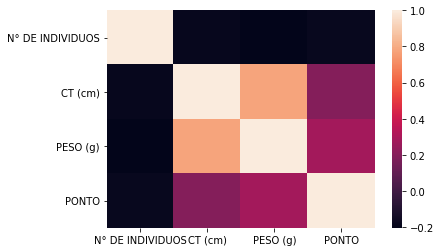

In [9]:
sns.heatmap(corr)

plt.show()

## Análises por ponto

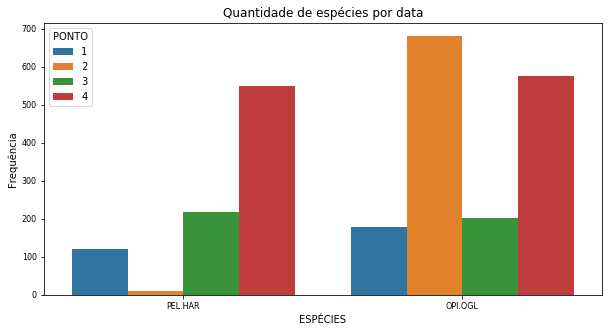

In [10]:

plt.figure(figsize = (10, 5))

sns.countplot(data = amostra,
              x = 'ESPECIE',
              hue = 'PONTO')

plt.title('Quantidade de espécies por data', fontsize = 12)
plt.xlabel('ESPÉCIES', fontsize = 10)
plt.ylabel('Frequência', fontsize = 10)

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.show()

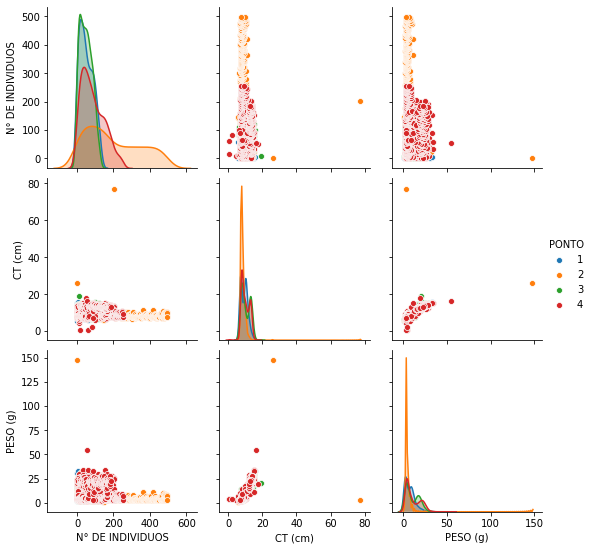

In [11]:
sns.pairplot(amostra, hue="PONTO")
plt.show()

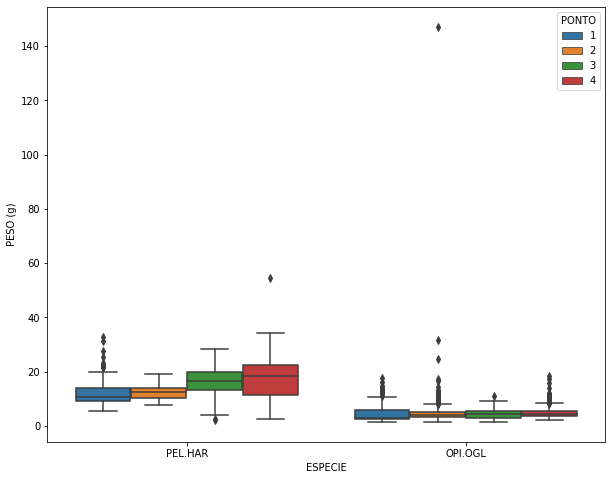

In [12]:
plt.figure(figsize = (10, 8))


sns.boxplot(x = 'ESPECIE',
            y = 'PESO (g)',
            hue = 'PONTO',
            data = amostra)

plt.show()

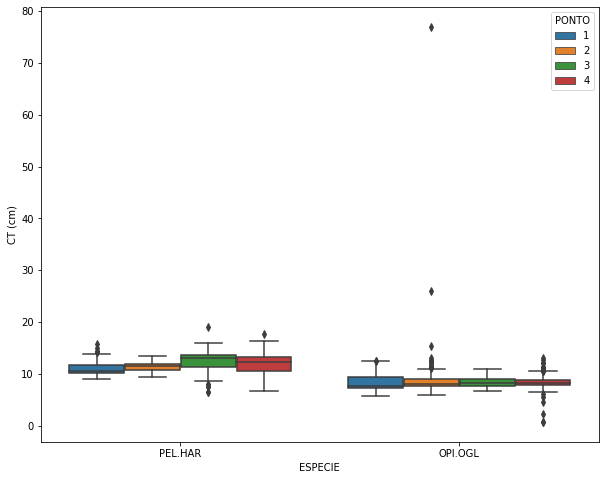

In [13]:
plt.figure(figsize = (10, 8))

sns.boxplot(x = 'ESPECIE',
            y = 'CT (cm)',
            hue = 'PONTO',
            data = amostra)


plt.show()

## Análises por data

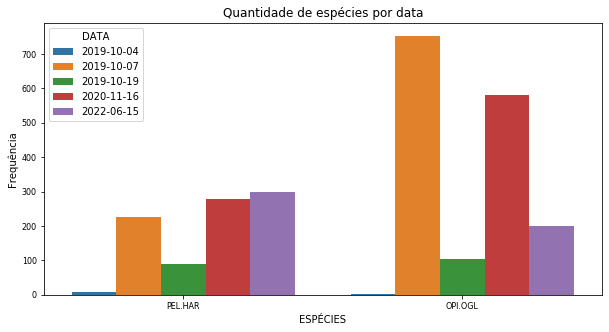

In [14]:

plt.figure(figsize = (10, 5))

sns.countplot(data = amostra,
              x = 'ESPECIE',
              hue = 'DATA')

plt.title('Quantidade de espécies por data', fontsize = 12)
plt.xlabel('ESPÉCIES', fontsize = 10)
plt.ylabel('Frequência', fontsize = 10)

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.show()

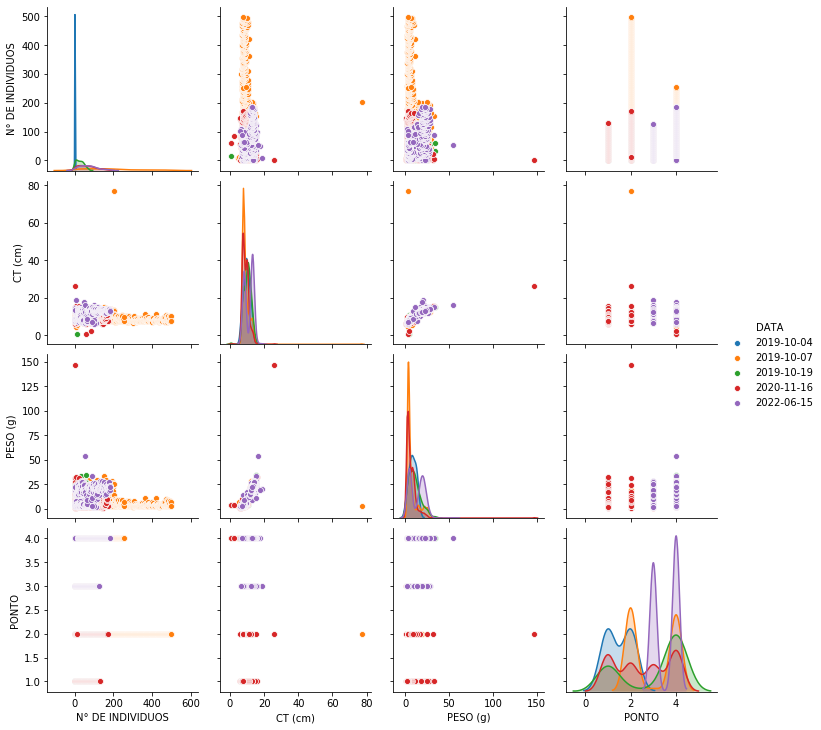

In [15]:
sns.pairplot(amostra, hue="DATA")
plt.show()

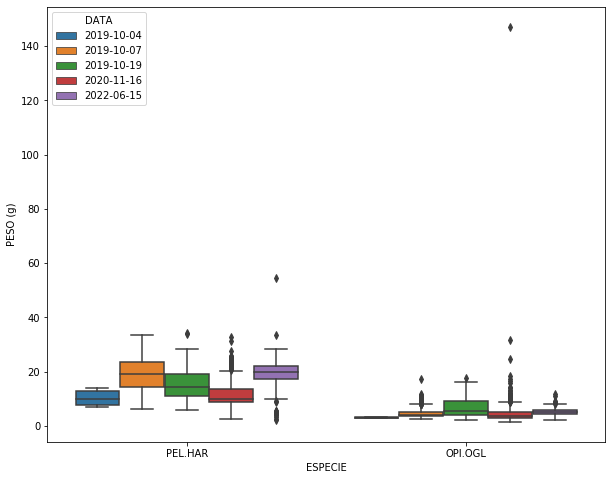

In [16]:
plt.figure(figsize = (10, 8))


sns.boxplot(x = 'ESPECIE',
            y = 'PESO (g)',
            hue = 'DATA',
            data = amostra)


plt.show()

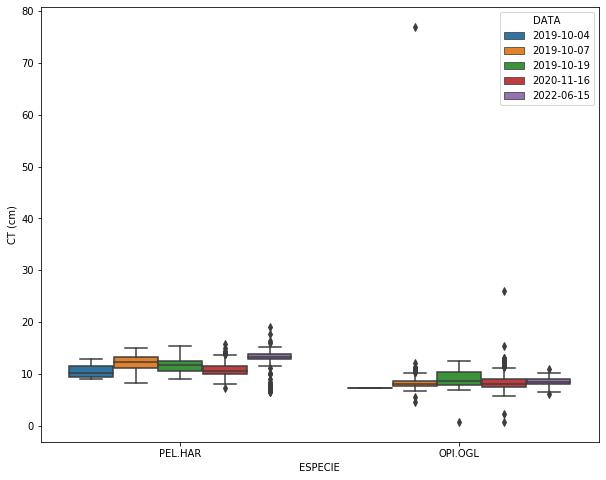

In [17]:
plt.figure(figsize = (10, 8))

sns.boxplot(x = 'ESPECIE',
            y = 'CT (cm)',
            hue = 'DATA',
            data = amostra)


plt.show()